In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearnex import patch_sklearn
patch_sklearn()
import warnings
import xgboost
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')




Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df = pd.read_csv(r'C:\Users\OneDrive\VS STUDIO\MyStuff\PracticeData\MSFT.csv')
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9665 entries, 0 to 9664
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9665 non-null   object 
 1   Open       9665 non-null   float64
 2   High       9665 non-null   float64
 3   Low        9665 non-null   float64
 4   Close      9665 non-null   float64
 5   Adj Close  9665 non-null   float64
 6   Volume     9665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 528.7+ KB


In [3]:
# Calculate the daily range (High - Low)
df['Daily_Range'] = df['High'] - df['Low']

# Calculate the average price
df['Average_Price'] = (df['High'] + df['Low'] + df['Close']) / 3

# Calculate the volatility
df['Volatility'] = (df['High'] - df['Low']) / df['Close']

# Calculate the volume change
df['Volume_Change'] = (df['Volume'] - df['Volume'].shift(1)) / df['Volume'].shift(1)

# Calculate the log return
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the difference between Open and Close prices
df['Difference'] = df['Open'] - df['Close']

# Create a 'Symbol' column based on Open and Close prices
df['Symbol'] = np.where(df['Open'] > df['Close'], 'Loss', np.where(df['Open'] < df['Close'], 'Profit', 'Same'))


In [4]:
# Check for null values
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Daily_Range      0
Average_Price    0
Volatility       0
Volume_Change    1
Log_Return       1
Difference       0
Symbol           0
dtype: int64

In [5]:
# Impute missing values in 'Volume_Change' and 'Log_Return' columns with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['Volume_Change', 'Log_Return']])
df[['Volume_Change', 'Log_Return']] = imputer.transform(df[['Volume_Change', 'Log_Return']])

In [6]:
# One-hot encode the 'Symbol' column
oe = OneHotEncoder()
cl = ['Symbol']
col = oe.fit_transform(df[cl]).toarray()
col_df = pd.DataFrame(col, columns=oe.get_feature_names_out())
df = pd.concat([df.drop(cl, axis=1), col_df], axis=1)
# Label encode the 'Date' column
le = LabelEncoder()
df['Date'] = le.fit_transform(df['Date'])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9665 entries, 0 to 9664
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9665 non-null   int64  
 1   Open           9665 non-null   float64
 2   High           9665 non-null   float64
 3   Low            9665 non-null   float64
 4   Close          9665 non-null   float64
 5   Adj Close      9665 non-null   float64
 6   Volume         9665 non-null   int64  
 7   Daily_Range    9665 non-null   float64
 8   Average_Price  9665 non-null   float64
 9   Volatility     9665 non-null   float64
 10  Volume_Change  9665 non-null   float64
 11  Log_Return     9665 non-null   float64
 12  Difference     9665 non-null   float64
 13  Symbol_Loss    9665 non-null   float64
 14  Symbol_Profit  9665 non-null   float64
 15  Symbol_Same    9665 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 1.2 MB


In [7]:
# Split the data into features (X) and target (y)
X = df.drop(['Open'], axis=1)
y = df['Open']

# Split the data into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models
model = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor(), SVR(kernel='rbf')]
model_names = [type(fmodel).__name__ for fmodel in model]
rmse_values = []

# Train and evaluate each model
for fmodel in model:
    fmodel.fit(X_train, y_train)
    y_pred = fmodel.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_test))
    rmse_values.append(rmse)
    print('-'*100)
    print(f'{type(fmodel).__name__} with  rmse: {rmse}')



----------------------------------------------------------------------------------------------------
LinearRegression with  rmse: 4.505852405327113e-10
----------------------------------------------------------------------------------------------------
Ridge with  rmse: 0.000528589496335608
----------------------------------------------------------------------------------------------------
Lasso with  rmse: 0.8014505329689726
----------------------------------------------------------------------------------------------------
DecisionTreeRegressor with  rmse: 0.9911483144022993
----------------------------------------------------------------------------------------------------
RandomForestRegressor with  rmse: 0.6532780243204513
----------------------------------------------------------------------------------------------------
GradientBoostingRegressor with  rmse: 0.8439615085349155
----------------------------------------------------------------------------------------------------
XGB

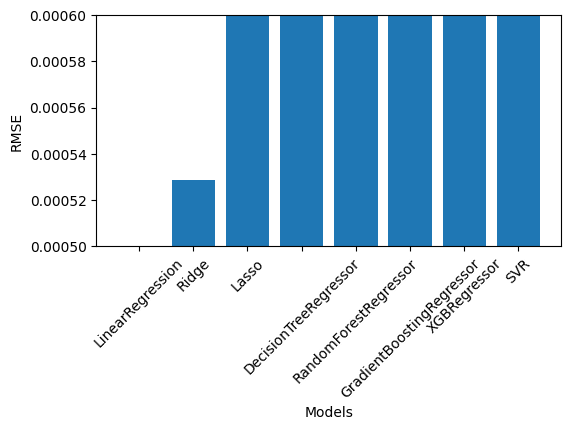

In [8]:
# Plot the RMSE values for each model
plt.figure(figsize=(6,3))
plt.bar(model_names, rmse_values)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.ylim(0.0005, 0.0006)
plt.show()



- LinearRegression has the lowest RMSE. 